In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import streamlit as st
import requests
from joblib import load

In [2]:
# source du dataset : https://www.kaggle.com/code/mfaisalqureshi/email-spam-detection-98-accuracy/input
df = pd.read_csv('data/emails.csv')
small_df = df.head(200)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [4]:
#X = df["Message"]  # simplification
#y = df["Spam"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])
y = df['Spam']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test)
print("Accuracy_score" ,accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"[[{cm[0,0]} {cm[0,1]}]")
print(f" [{cm[1,0]} {cm[1,1]}]]")

Accuracy_score 0.9775784753363229
Confusion Matrix:
[[946 6]
 [19 144]]


In [ ]:
def test_model_exists():
    assert os.path.exists("model.pkl")

<Figure size 600x400 with 0 Axes>

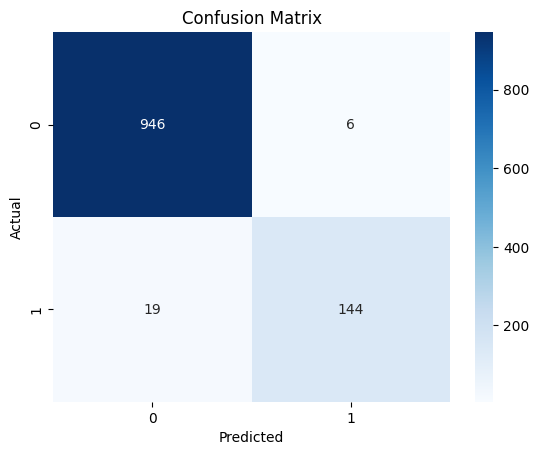

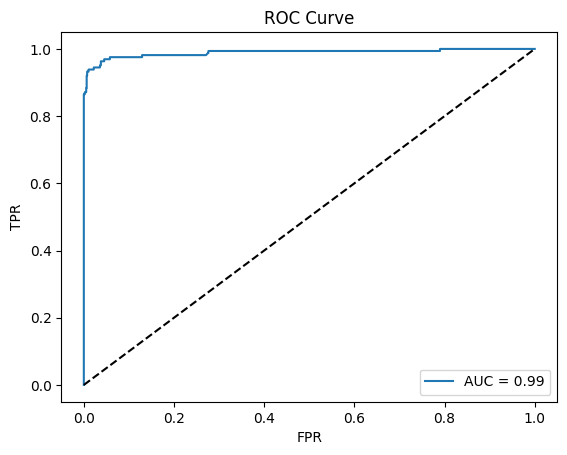

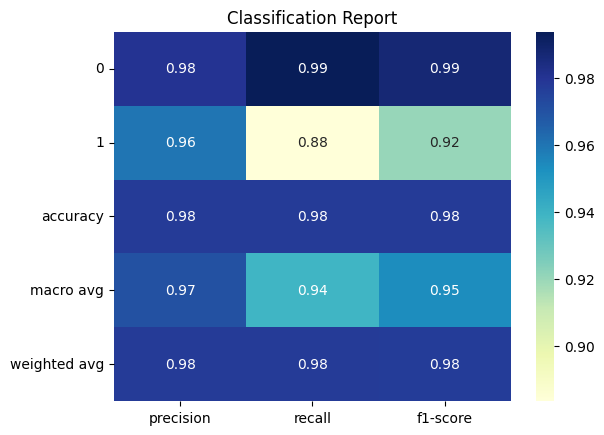

In [9]:
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig2, ax2 = plt.subplots()
ax2.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.set_title('ROC Curve')
ax2.legend()

report = classification_report(y_test, y_pred, output_dict=True)

fig3, ax3 = plt.subplots()
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu', ax=ax3)
plt.title("Classification Report")
plt.show()

In [10]:
new_row = {
    'Category': ['Spam'],
    'Message': ['Hello ! Rejoice, you have been selected as one of the few lucky ones to receive a discount on our most valuable products!']
}

# Make data frame of above data
add_df = pd.DataFrame(new_row)

# append data frame to CSV file
add_df.to_csv('data\emails.csv', mode='a', index=False, header=False)

<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
C:\Users\wende\AppData\Local\Temp\ipykernel_42592\4102649895.py:10: SyntaxWarning: invalid escape sequence '\e'
  add_df.to_csv('data\emails.csv', mode='a', index=False, header=False)


In [11]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [15]:
response = requests.post("http://127.0.0.1:8000/predict", json={"message": "This is a limited-time offer!"})
print(response.json())

{'prediction': 'not spam', 'confidence': 0.9641}


In [17]:
pipeline = load("model.pkl")

# Check pipeline structure
assert 'vectorizer' in pipeline.named_steps
assert 'classifier' in pipeline.named_steps

# Inspect vocabulary size
vocab_size = len(pipeline.named_steps['vectorizer'].vocabulary_)
assert vocab_size > 10

In [18]:
vocab_size

7834

In [ ]:
# Le modèle n'est pas assez bon à détecter les spams car les données ne donne pas de mails de spams assez variés (pas de type "gagnez un voyage gratuit!!!" comme spam)
